In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Part4 - batting_bowling_ipl_bat.csv')

In [3]:
df.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(180, 7)

In [5]:
missing_values_cols=df.columns[df.isnull().any()]
# Number of missing values in each column
df[missing_values_cols].isnull().sum()

Name     90
Runs     90
Ave      90
SR       90
Fours    90
Sixes    90
HF       90
dtype: int64

In [31]:
df.dropna(inplace=True)

In [32]:
df.shape

(90, 7)

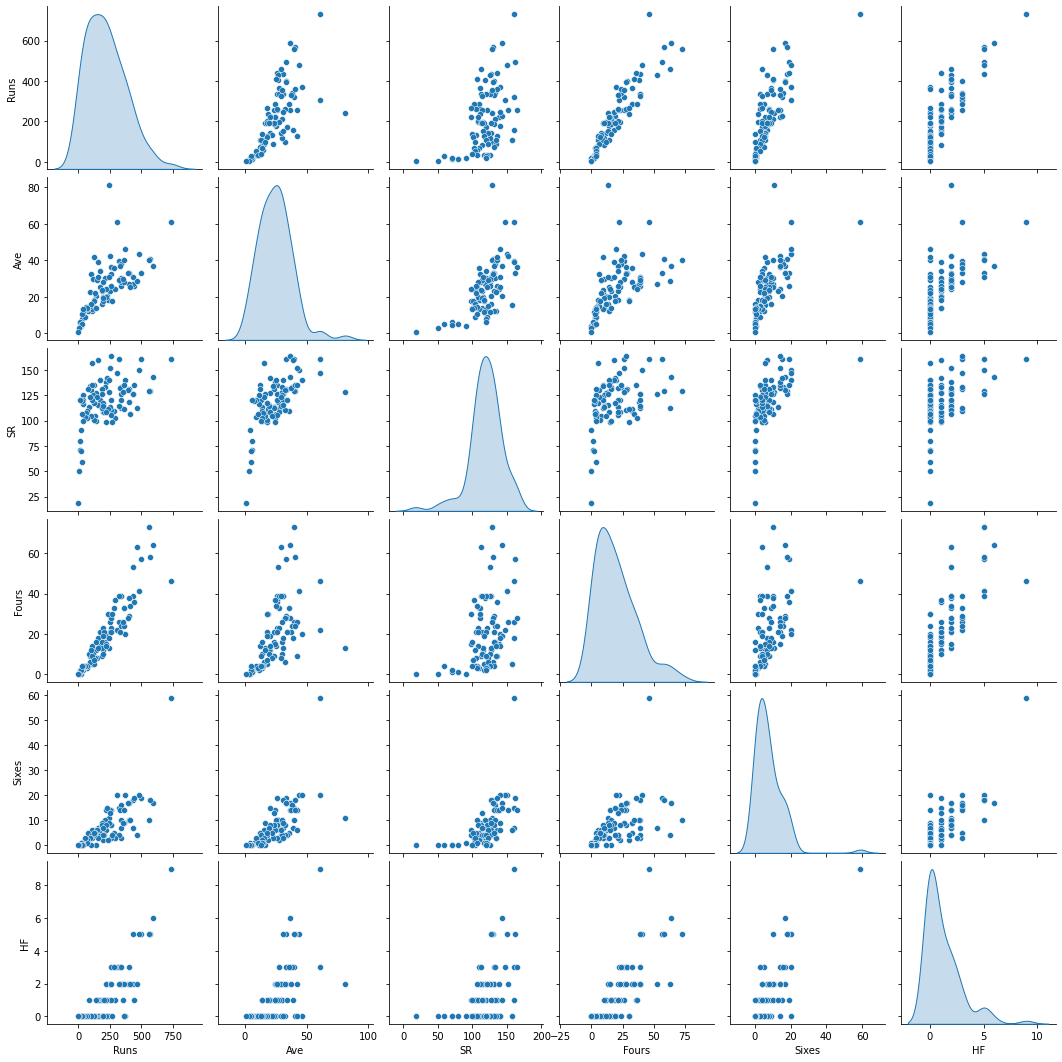

In [16]:
sns.pairplot(df,diag_kind="kde")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [35]:
df['Name'] = pd.Categorical(df['Name'])

In [37]:
df.Runs.unique()


array([733., 590., 495., 479., 569., 560., 305., 433., 319., 244., 256.,
       255., 398., 340., 371., 396., 441., 333., 432., 462., 157., 336.,
       362., 285., 405., 220., 335., 364., 225., 324., 261., 409., 357.,
       213., 245., 126., 172., 289., 176., 186., 143., 196.,  98., 260.,
       107., 197., 120., 145., 191., 200., 153.,  90., 238., 194., 268.,
       108.,  83.,  75., 132., 127., 106.,  91., 140., 124.,  35.,  68.,
        58.,  31.,  69.,  55.,  32.,  18.,  40.,  19.,  16.,  12.,  30.,
         6.,   2.])

In [38]:
df.Ave.unique()

array([61.08, 36.87, 33.  , 43.54, 40.64, 40.  , 61.  , 30.92, 39.87,
       81.33, 36.57, 42.5 , 33.16, 37.77, 46.37, 25.94, 37.  , 27.  ,
       28.87, 39.25, 25.84, 40.22, 35.62, 30.54, 24.44, 27.91, 28.  ,
       20.45, 29.45, 32.62, 25.56, 29.75, 30.42, 25.6 , 30.62, 23.18,
       42.  , 34.4 , 24.08, 25.14, 23.25, 20.42, 32.66, 26.  , 15.28,
       19.7 , 30.  , 29.  , 15.91, 18.18, 30.6 , 22.5 , 23.87, 18.3 ,
       20.  , 17.63, 17.86, 19.4 , 12.  , 13.83, 12.5 , 22.  , 18.14,
       13.25, 15.16, 14.  , 17.71, 16.33, 11.66, 13.6 , 14.5 ,  8.75,
        7.75, 13.8 ,  9.16, 10.66,  6.  , 13.33,  3.8 ,  5.33,  4.75,
        5.  ,  3.  ,  0.5 ])

In [45]:
df.SR.unique()

array([160.74, 143.55, 161.23, 149.68, 129.61, 129.33, 147.34, 126.6 ,
       161.11, 128.42, 164.1 , 151.78, 130.92, 132.81, 140.53, 129.83,
       135.69, 132.14, 126.31, 112.13, 160.2 , 125.84, 135.58, 109.19,
       118.07, 120.  , 138.36, 112.41, 111.65, 142.4 , 114.48, 110.59,
       106.51, 128.41, 133.12, 120.75, 140.  , 113.83, 135.48, 120.27,
       102.12, 139.68, 130.98, 127.67, 108.28, 130.66, 105.69, 157.35,
       115.2 , 125.  , 122.88, 126.49,  98.65, 108.69, 115.03, 134.32,
       112.35, 111.73, 108.91, 117.57,  98.89, 114.79, 135.  , 113.69,
       131.57, 104.76, 117.59, 120.45, 122.97,  99.29, 100.81, 104.25,
       109.67, 116.66, 107.4 , 120.68, 119.23, 102.98, 103.77, 106.66,
       100.  ,  90.47,  80.  ,  70.58,  70.37,  58.82,  50.  ,  18.18])

In [46]:
df.Sixes.unique()

array([59., 17., 19., 20., 18., 10., 15., 11., 14., 16.,  7.,  4.,  5.,
        3.,  9.,  8., 13.,  6.,  2.,  0.,  1.])

In [47]:
df.HF.unique()

array([9., 6., 5., 3., 2., 0., 1.])

In [48]:
X = df.drop("Name", axis=1)
y = df['Name']

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [50]:
from sklearn.tree import DecisionTreeClassifier

dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 2, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.06349206349206349
0.0


In [61]:
df=pd.read_csv('Part4 - batting_bowling_ipl_bat.csv')
df.drop(['Name'],inplace=True,axis=1)
df.dropna(inplace=True)

In [62]:
from scipy.stats import zscore
df_scaled=df.apply(zscore)

In [63]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
meanDist=[]
clusters=range(1,10)

In [64]:
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_scaled)
    prediction=model.predict(df_scaled)
    meanDist.append(sum(np.min(cdist(df_scaled,model.cluster_centers_,"euclidean"),axis=1))/df_scaled.shape[0])

C:\Users\ZohaA3\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


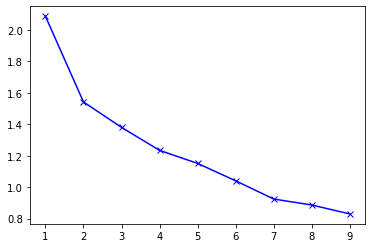

In [65]:
plt.plot(clusters,meanDist,'bx-')

In [66]:
model1=KMeans(2)
model1.fit(df_scaled)
prediction=model1.predict(df_scaled)
df_scaled['GROUP']=prediction
df['GROUP']=prediction
df_scaled.head()
df_clusters=df_scaled.groupby(['GROUP'])
df_clusters.mean()

,Runs,Ave,SR,Fours,Sixes,HF
GROUP,,,,,,
0,-0.625472,-0.527779,-0.369086,-0.58128,-0.495352,-0.57806
1,0.982885,0.829367,0.579992,0.91344,0.778410,0.90838


In [67]:
from sklearn.model_selection import train_test_split
X=df.drop(['GROUP'],axis=1)
Y=df['GROUP']
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

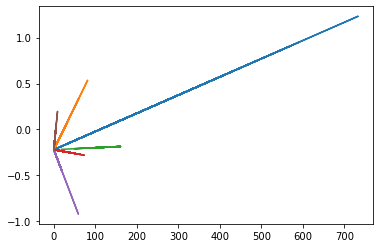

In [68]:
from sklearn.linear_model import LinearRegression
modelL1=LinearRegression()
modelL1.fit(X_train,Y_train)
y_pred=modelL1.predict(x_test)
b1=modelL1.coef_
b0=modelL1.intercept_
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X_train,b1*X_train+b0)

In [69]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
mse = mean_squared_error(y_test, y_pred)
rms = sqrt(mse)
r2Score = r2_score(y_test, y_pred)
print("The Root Mean Sq Error is {} and R^2 error is {}".format(rms,r2Score))
print(modelL1.score(X_train,Y_train))
print(modelL1.score(x_test,y_test))

The Root Mean Sq Error is 0.33042955085315084 and R^2 error is 0.3682943761258418
0.6868083048533722
0.3682943761258418
